# <center> Face detection</center>
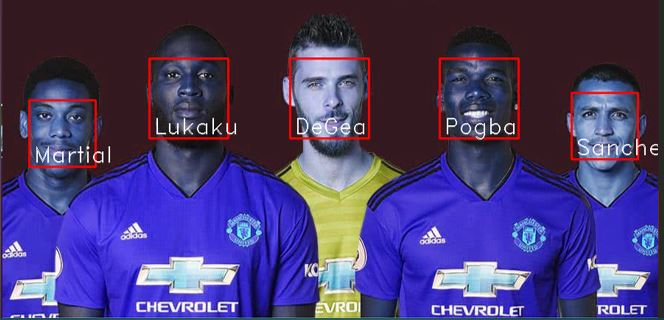

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt
import pickle
import cv2

# Charger le modèle 

In [2]:
def read_model(filename, path):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [3]:

def convert_to_name(val):
    if(type(val) == str): return val
    li = [i for i in range(22)]
    li_name= ["alessandro_del_piero",
              "andreas_iniesta",
              "andriy_shevchenko",
              "cristiano_ronaldo",
              "didier_drogba",
              "diego_maradona",
              "edinson_cavani",
              "francesco_totti",
              "gianlugi_buffon",
              "iker_casillas",
              "lionel_messi",
              "luka_modric",
              "mohamed_salah",
              "pavel_nedved",
              "pele",
              "riyan_giggs",
              "roberto_baggio",
              "roberto_carlos",
              "ronaldinho",
              "ronaldo_nazario",
              "samuel_eto",
              "zlatan_ibrahimovic"]
    k = 0
    for k,v in enumerate(li):
        if v==val:
            return li_name[k]

In [4]:
model = read_model('model.pkl','')

Number of faces detected:  1


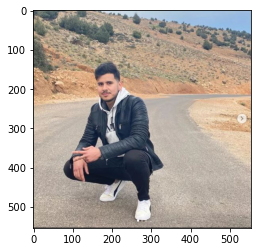

In [6]:
test = 'brahim.jpg'
test_image = face_recognition.load_image_file(test)
plt.imshow(test_image)

#Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Tester le modele 

In [16]:
def predire(test_image):
    cascPath = 'visage.xml'
    faceCascade = cv2.CascadeClassifier(cascPath)
    faces = faceCascade.detectMultiScale(
        test_image,
        scaleFactor=1.1,
        minNeighbors=4,
        minSize=(30, 30)
    )

    k=0

    for (x, y, w, h) in faces:
        if(k<no):
            test_image_enc = face_recognition.face_encodings(test_image)[k]
            name= model.predict([test_image_enc])
            probability = model.predict_proba([test_image_enc])
            m=max(probability[0])
            k+=1
            if(m < 0.5):
                name=['inconnu']
            cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            font = cv2.FONT_ITALIC

            org = (50, 50) 

            fontScale = 1

            color = (255, 0, 0) 
            thickness = 2
            pred = convert_to_name(*name)
            cv2.putText(test_image, pred, (x,y), font,  fontScale, color, thickness, cv2.LINE_AA)
    plt.imshow(test_image)

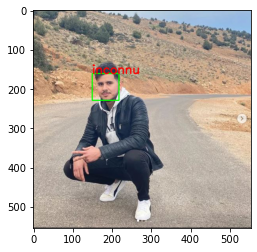

In [17]:
test = 'brahim.jpg'
test_image = face_recognition.load_image_file(test)
predire(test_image)

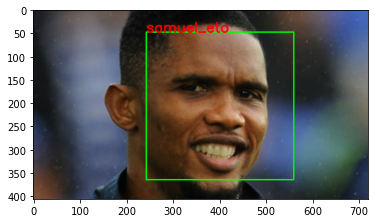

In [18]:
test = 'f0713580ca.jpg'
test_image = face_recognition.load_image_file(test)
predire(test_image)